In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#read in images
family_img = cv2.imread('/Users/vickieluo/bayes/portrait.jpg')
family_mask = cv2.imread('/Users/vickieluo/bayes/portrait.png', 0) 
family_mask = np.where(family_mask >= 127, 255, 0).astype(np.uint8) 
portrait_img = cv2.imread('/Users/vickieluo/bayes/family.jpg')
portrait_mask = cv2.imread('/Users/vickieluo/bayes/family.png', 0)

In [ ]:
#make images same size since they were screenshots
family_img = cv2.resize(family_img, (family_mask.shape[1], family_mask.shape[0]))
portrait_mask = cv2.resize(portrait_mask, (portrait_img.shape[1], portrait_img.shape[0]), interpolation=cv2.INTER_NEAREST)

In [5]:
family_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
#make mask values all zeros or 255 since the screenshot messed up pixel values
family_skin_pixels = family_img[family_mask == 255]
family_non_skin_pixels = family_img[family_mask == 0]

In [ ]:
#get the distribution of pixel values for each color channel
def create_histogram(pixels):
    hist, _ = np.histogram(pixels, bins=256, range=(0, 256), density=True)
    return hist

skin_hist = []
non_skin_hist = []
for i in range(3):
  skin_hist.append(create_histogram(family_skin_pixels[:, i]))
  non_skin_hist.append(create_histogram(family_non_skin_pixels[:, i]))

In [ ]:
#get total probability of pixel being skin and pixel not being skin from given mask
total_prob_skin = len(family_skin_pixels)/ (len(family_skin_pixels) + len(family_non_skin_pixels))
total_prob_not_skin = len(family_non_skin_pixels)/ (len(family_skin_pixels) + len(family_non_skin_pixels))

In [9]:
h, w, _ = portrait_img.shape
detected_mask = np.zeros((h, w), dtype=np.uint8)

In [ ]:
#use bayes theorem to calculate the whether pixel is skin or not and check to see if prediction is correct
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in range(h):
  for j in range(w):
    pixel = portrait_img[i][j]
    skin_prob = 1
    not_skin_prob = 1
    for p in range(3):
      skin_prob *= skin_hist[p][pixel[p]]
      not_skin_prob *= non_skin_hist[p][pixel[p]]
    skin_prob *= total_prob_skin
    not_skin_prob *= total_prob_not_skin
    if skin_prob > not_skin_prob:
      detected_mask[i][j] = 255
      if portrait_mask[i][j] == 255:
        true_pos += 1
      else:
        false_pos += 1
    else:
      detected_mask[i][j] = 0
      if portrait_mask[i][j] == 0:
        true_neg += 1
      else:
        false_neg += 1


      

In [ ]:
true_pos_rate = true_pos/(true_pos + false_neg)
true_neg_rate = true_neg/(true_neg + false_pos)
false_pos_rate = false_pos/(true_neg + false_pos)
false_neg_rate = false_neg/(true_pos + false_neg)

In [12]:
print(f"True Positive Rate: {true_pos_rate:.2f}")
print(f"True Negative Rate: {true_neg_rate:.2f}")
print(f"False Positive Rate: {false_pos_rate:.2f}")
print(f"False Negative Rate: {false_neg_rate:.2f}")

True Positive Rate: 0.12
True Negative Rate: 0.73
False Positive Rate: 0.27
False Negative Rate: 0.88


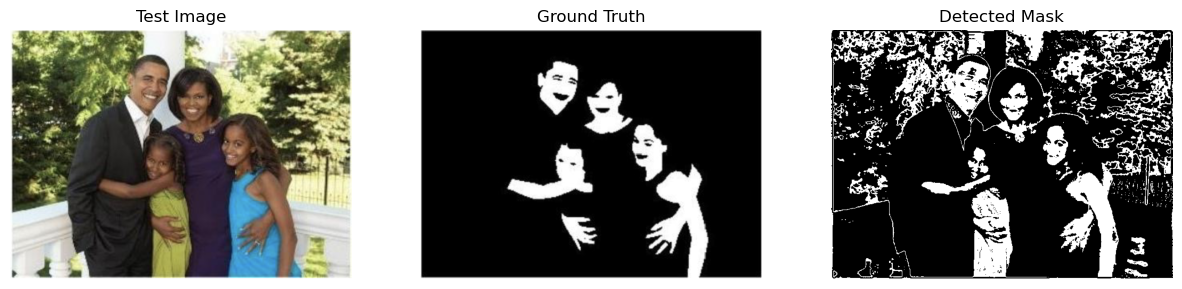

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Test Image")
plt.imshow(cv2.cvtColor(portrait_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Ground Truth")
plt.imshow(portrait_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Detected Mask")
plt.imshow(detected_mask, cmap='gray')
plt.axis('off')

plt.show()